**SMS CLASSIFIER**
* Created by - Shreyasi Mondal

**AIM: To create a text classification model to classify SMS as either spam or ham**

* Importing the required packages like numpy, pandas,etc.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Mounted at /content/drive


* Loading the csv file contaning the dataset

In [ ]:
df=pd.read_csv('/content/drive/My Drive/spam.csv',encoding='latin-1')

In [ ]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


**About the Dataset:**
* In this dataset there are 5572 rows and 5 columns and it contains all the possible spam and ham sms


In [ ]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
df.sample(5)

,v1,v2
5234,ham,Ok cool. See ya then.
1476,ham,I'm watching lotr w my sis dis aft. So u wan 2...
4645,spam,We tried to contact you re your reply to our o...
766,ham,"I'm nt goin, got somethin on, unless they meet..."
1297,ham,"K so am I, how much for an 8th? Fifty?"


In [ ]:
df.shape

(5572, 2)

**DATA CLEANING**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(10)

,target,text
3063,ham,Ok. How many should i buy.
2295,ham,HI DARLIN IM MISSIN U HOPE YOU ARE HAVING A GO...
3293,ham,Beautiful tomorrow never comes.. When it comes...
272,spam,HMV BONUS SPECIAL 500 pounds of genuine HMV vo...
4539,ham,"Urgh, coach hot, smells of chip fat! Thanks ag..."
2240,ham,K I'll call you when I'm close
5151,ham,No problem with the renewal. I.ll do it right ...
2696,ham,Nope but i'm going home now then go pump petro...
865,spam,Congratulations ur awarded either a yrs supply...
777,ham,\Hi its Kate it was lovely to see you tonight ...


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [ ]:
df['target']=encoder.fit_transform(df['target'])

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
#check for duplicate values
df.duplicated().sum()

403

In [ ]:
#removing duplicates
df=df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(5169, 2)

**EXPLORATORY DATA ANALYSIS (EDA)**

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

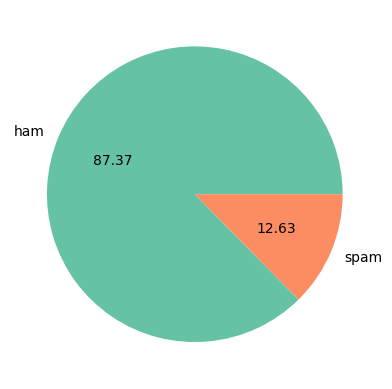

In [ ]:
colors = ['#66c2a5', '#fc8d62']
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f",colors=colors)
plt.show

* In this pie chart it implies that the dataset contains maximum number of ham sms (87.37) compared to spam sms (12.63)

**Installing the natural language tool kit**

In [ ]:
!pip install nltk

In [ ]:
#importing natural language tool kit
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['num_characters']=df['text'].apply(len) #number of char

<ipython-input-24-2c47cf6109e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']=df['text'].apply(len) #number of char


In [ ]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
#number of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

<ipython-input-26-b9385cd23f17>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [ ]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
#number of sentences
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

<ipython-input-28-3a417ba2127b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe() #targeting ham

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe() #targeting spam

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

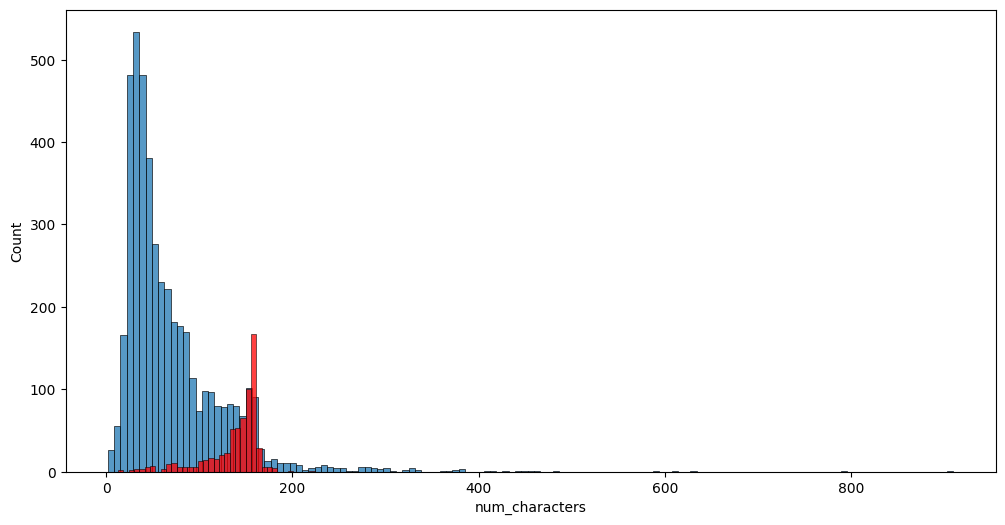

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

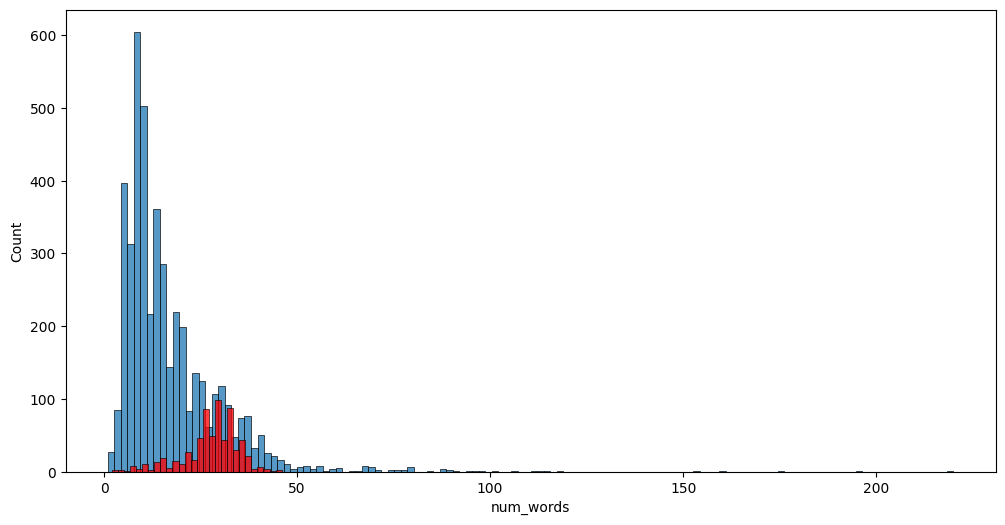

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

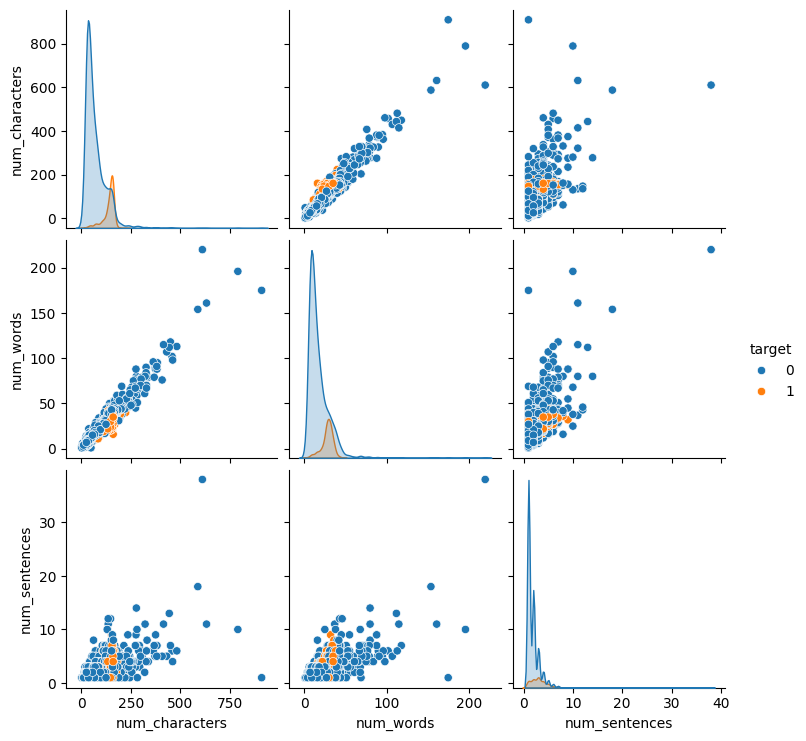

In [ ]:
sns.pairplot(df, hue='target')

<ipython-input-37-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

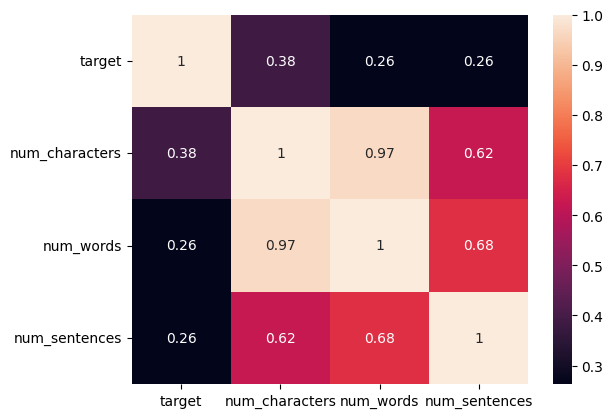

In [ ]:
sns.heatmap(df.corr(),annot=True)

**Data Preprocessing**

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

nltk.download('stopwords')

ps=PorterStemmer()

def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)
transformed_text=transform_text("I'm gonna be home soon and i don't to talk about this stuff anymore tonight, k? I've cried enough today.")
print(transformed_text)

gon na home soon talk stuff anymor tonight k cri enough today


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [ ]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('eating')

'eat'

In [ ]:
df['transformed_text']=df['text'].apply(transform_text)

<ipython-input-41-98fa9b97913c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text']=df['text'].apply(transform_text)


In [ ]:
df.head

<bound method NDFrame.head of       target                                               text  \
0          0  Go until jurong point, crazy.. Available only ...   
1          0                      Ok lar... Joking wif u oni...   
2          1  Free entry in 2 a wkly comp to win FA Cup fina...   
3          0  U dun say so early hor... U c already then say...   
4          0  Nah I don't think he goes to usf, he lives aro...   
...      ...                                                ...   
5567       1  This is the 2nd time we have tried 2 contact u...   
5568       0              Will Ì_ b going to esplanade fr home?   
5569       0  Pity, * was in mood for that. So...any other s...   
5570       0  The guy did some bitching but I acted like i'd...   
5571       0                         Rofl. Its true to its name   

      num_characters  num_words  num_sentences  \
0                111         24              2   
1                 29          8              2   
2                155         37              2   
3                 49         13              1   
4                 61         15              1   
...              ...        ...            ...   
5567             161         35              4   
5568              37          9              1   
5569              57         15              2   
5570             125         27              1   
5571              26          7              2   

                                       transformed_text  
0     go jurong point crazi avail bugi n great world...  
1                                 ok lar joke wif u oni  
2     free entri 2 wkli comp win fa cup final tkt 21...  
3                   u dun say earli hor u c alreadi say  
4                  nah think goe usf live around though  
...                                                 ...  
5567  2nd time tri 2 contact u pound prize 2 claim e...  
5568                              b go esplanad fr home  
5569                                  piti mood suggest  
5570  guy bitch act like interest buy someth els nex...  
5571                                     rofl true name  

[5169 rows x 6 columns]>

In [ ]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

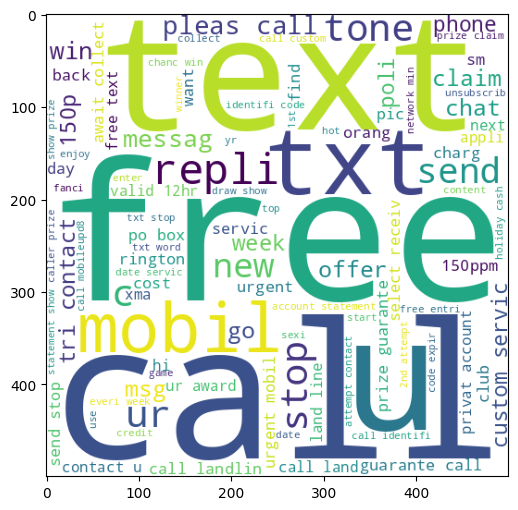

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [ ]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

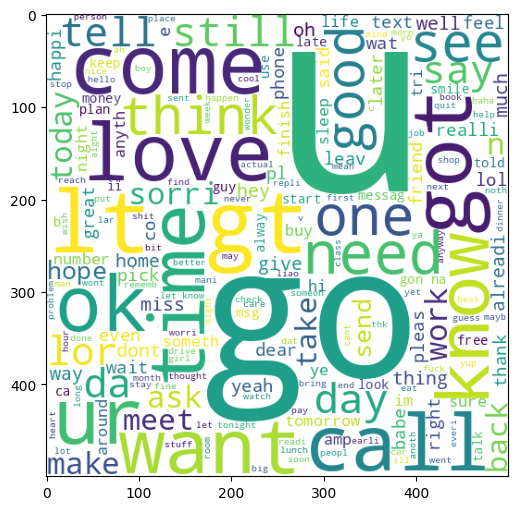

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

**Modelling**

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)


In [ ]:
X=tfidf.fit_transform(df['transformed_text']).toarray()


In [ ]:
X.shape

(5169, 3000)

In [ ]:
y=df['target'].values

**Splitting the dataset into training and testing data**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb=GaussianNB() #Gaussian Naive Bayes classifier
mb=MultinomialNB() #Multinomial Naive Bayes classifier
bnb=BernoulliNB() #Bernoulli Naive Bayes classifier


In [ ]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


**Accuracy**:

The Gaussian Naive Bayes classifier achieved an accuracy of approximately 86.94% on the test data. In the context of spam classification, this indicates that the model correctly classified about 86.94% of the messages as either spam or non-spam (ham).This has achieved a relatively high accuracy but had a lower precision in identifying spam messages, suggesting that it may have misclassified some non-spam messages as spam.

**Confusion Matrix**:

The confusion matrix provides a detailed breakdown of the classifier's predictions compared to the actual labels. It is structured as follows:
True Negative (TN): 788
These are the non-spam messages (ham) that the classifier correctly identified as non-spam.

False Positive (FP): 108
These are the non-spam messages that the classifier incorrectly classified as spam.

False Negative (FN): 27
These are the spam messages that the classifier incorrectly classified as non-spam.

True Positive (TP): 111
These are the spam messages that the classifier correctly identified as spam.

In the context of spam classification:

TN (788) represents the number of correctly classified non-spam messages.
FP (108) represents the number of non-spam messages incorrectly classified as spam.
FN (27) represents the number of spam messages incorrectly classified as non-spam.
TP (111) represents the number of correctly classified spam messages.

**Precision**:

The precision score measures the ratio of correctly predicted positive observations (TP) to the total predicted positives (TP + FP). In this case, it indicates that the classifier achieved a precision of approximately 50.68% in identifying spam messages. This means that out of all the messages predicted as spam, about 50.68% were actually spam.

In [ ]:
from sklearn.naive_bayes import MultinomialNB as mnb

In [ ]:
mnb = mnb()
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)

print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


**Accuracy**:

The MNB classifier achieved an accuracy of approximately 97.10% on the test data. This indicates that the model performed very well in correctly classifying messages as spam or non-spam.

**The confusion matrix**:

The confusion matrix for the MNB classifier is as follows:
True Negative (TN): 896
These are the non-spam messages (ham) that the classifier correctly identified as non-spam.

False Positive (FP): 0
There were no non-spam messages incorrectly classified as spam.

False Negative (FN): 30
These are the spam messages incorrectly classified as non-spam.

True Positive (TP): 108
These are the spam messages correctly identified as spam.

In this case, the MNB classifier made no false positive errors (no non-spam messages classified as spam), which is reflected in the confusion matrix.

**Precision**:

The precision score for the MNB classifier is 1.0 (or 100%). This indicates that the classifier achieved perfect precision in identifying spam messages. All the messages predicted as spam were actually spam.

In [ ]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


**Accuracy**:

The BNB classifier achieved an accuracy of approximately 98.36% on the test data. This indicates that the model performed very well in correctly classifying messages as spam or non-spam.

**The confusion matrix**:

True Negative (TN): 895
These are the non-spam messages (ham) that the classifier correctly identified as non-spam.

False Positive (FP): 1
This is the number of non-spam messages incorrectly classified as spam.

False Negative (FN): 16
These are the spam messages incorrectly classified as non-spam.

True Positive (TP): 122
These are the spam messages correctly identified as spam.

In this case, the BNB classifier made a very low false positive error (1 non-spam message classified as spam), which is reflected in the confusion matrix.

**Precision**:

The precision score for the BNB classifier is 0.9919 (or 99.19%). This indicates that the classifier achieved high precision in identifying spam messages. Almost all the messages predicted as spam were actually spam.


**Conclusion**

In conclusion, both Multinomial Naive Bayes and Bernoulli Naive Bayes outperformed Gaussian Naive Bayes in terms of accuracy and precision for spam classification. Between MNB and BNB, BNB achieved slightly higher accuracy and precision, making it the preferred choice for this specific spam classification task. However, the choice of classifier may depend on the specific requirements and characteristics of the dataset and problem domain.